In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

plt.style.use("notes.mplstyle")

## Secular motion + micromotion in an RF trap

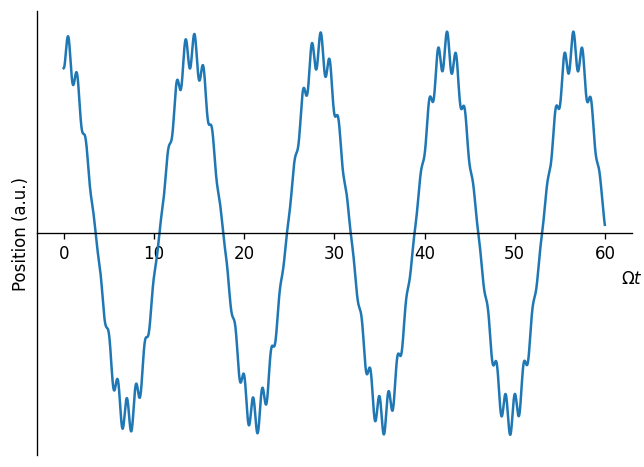

In [2]:
def rf_trap(t, A, q):
    return (
        A
        * np.cos(2 * np.pi * q / 2 / np.sqrt(2) * t)
        * (1 - q / 2 * np.cos(2 * np.pi * t))
    )


A = 10
q = 0.2
t = np.arange(0, 60, 0.01)
x = rf_trap(t, A, q)

tex_rc_params = {
    # "text.usetex": True,
    # "font.family": "Helvetica"
}

with plt.style.context(tex_rc_params):

    fig, ax = plt.subplots()
    ax.plot(t, x)

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.spines["bottom"].set_position(("data", 0))

    ax.set(yticks=[], ylabel="Position (a.u.)")
    ax.set_xlabel("$\\Omega t$", x=1)
    # ax.text(
    #     0.05,
    #     1.05,
    #     r"$x = A \cos\left(\frac{q}{2\sqrt{2}} \Omega t\right) \left[1 - \frac{q}{2} \cos(\Omega t)\right]$",
    #     verticalalignment="top",
    #     horizontalalignment="left",
    #     transform=ax.transAxes,
    # )

# Stability diagram of the Mathieu equation

In [3]:
from scipy.special import mathieu_a, mathieu_b

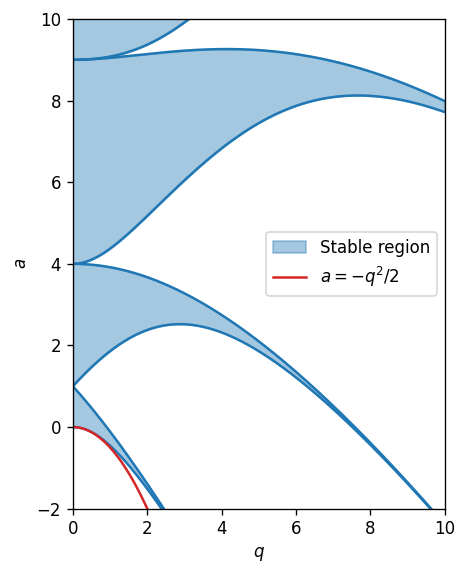

In [4]:
fig, ax = plt.subplots(figsize=(4, 5.3))


q = np.arange(0, 10, 0.01)
for m in range(4):
    a = mathieu_a(m, q)
    b = mathieu_b(m + 1, q)

    ax.plot(q, a, color="C0")
    ax.plot(q, b, color="C0")
    ax.fill_between(q, a, b, color="C0", alpha=0.4, label="Stable region" if m == 0 else None)
    
    
a_ps_0 = - q**2 / 2
ax.plot(q, a_ps_0, color="C3", label="$a = -q^2 / 2$")

ax.set(xlim=(0, 10), ylim=(-2, 10), xlabel="$q$", ylabel="$a$")
ax.legend()

## Penning trap frequencies

Text(0.765, 0.5, 'unstable')

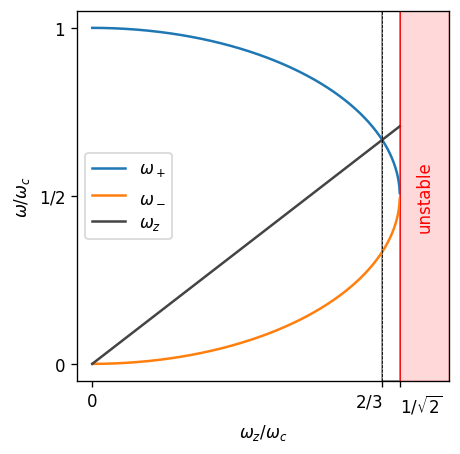

In [67]:
def _omega_plus(r):
    # r = omega_z / omega_c
    return 1/2 + np.sqrt(1 - 2*r**2) / 2

def _omega_minus(r):
    # r = omega_z / omega_c
    return 1/2 - np.sqrt(1 - 2*r**2) / 2


r = np.arange(0, 1/np.sqrt(2), 1e-3)
omega_plus = _omega_plus(r)
omega_minus = _omega_minus(r)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(r, omega_plus, label="$\\omega_+$")
ax.plot(r, omega_minus, label="$\\omega_-$")
ax.plot(r, r, color="#444444", label="$\\omega_z$")
ax.legend(loc="best")
ax.set(xlabel="$\\omega_z / \\omega_c$", ylabel="$\\omega / \\omega_c$")

ax.axvline(2/3, color="black", ls="--", lw=0.5)
ax.axvline(1/np.sqrt(2), color="red", lw=0.5)
ax.set(xticks=[0, 2/3, 1/np.sqrt(2)], xticklabels=[0, "$2/3$", "$1/\\sqrt{2}$"])
ax.set(yticks=[0, 1/2, 1], yticklabels=[0, "$1/2$", 1])
ax.set(xlim=(None, 0.82))
ax.get_xaxis().majorTicks[1].label1.set_horizontalalignment('right')
ax.get_xaxis().majorTicks[2].label1.set_horizontalalignment('left')

ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.fill_betweenx(ylim, 2/3, 1/np.sqrt(2), fc="none", alpha=0.45)
ax.fill_betweenx(ylim, 1/np.sqrt(2), 0.82, color="red", alpha=0.15)
ax.text(0.765, 0.5, "unstable", color="red", rotation=90, va="center", ha="center")	


